# Time Series prediction of the  Daily Electricity Demand 2014-2018


* To Train a Machine Learning model being able to forecast (predict on future data) periods ahead
* Feature Engineering process on data statistical properties
* Assessment will be carried out computing MAPE (Mean Absolute Percent Error) for each forecating horizong on a holdout dataset

In [5]:
import pandas as pd
import datetime as dt
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy.stats import skew, kurtosis, shapiro

In [6]:
import warnings
warnings.filterwarnings('ignore')

### Import data

The data is the daily electricity market demand in MWh

In [7]:
data = pd.read_csv("spain_energy_market.csv", sep=",", parse_dates=["datetime"])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  40212 non-null  datetime64[ns]
 1   id        40212 non-null  int64         
 2   name      34734 non-null  object        
 3   geoid     10956 non-null  float64       
 4   geoname   10956 non-null  object        
 5   value     40212 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.8+ MB


In [9]:
data['name'].unique()

array(['Precio mercado SPOT Diario ESP', 'Precio mercado SPOT Diario FRA',
       'Precio mercado SPOT Diario POR',
       'Energía asignada en Mercado SPOT Diario España',
       'Energía asignada en Mercado SPOT Diario Francia', nan,
       'Rentas de congestión mecanismos implícitos diario Francia exportación',
       'Rentas de congestión mecanismos implícitos diario Portugal exportación',
       'Rentas de congestión mecanismos implícitos diario Francia importación',
       'Rentas de congestión mecanismos implícitos diario Portugal importación',
       'Demanda real', 'Demanda programada PBF total',
       'Generación programada PBF total',
       'Generación programada PBF Eólica',
       'Generación programada PBF Ciclo combinado',
       'Generación programada PBF Carbón',
       'Generación programada PBF Nuclear',
       'Generación programada PBF Gas Natural Cogeneración',
       'Generación programada PBF UGH + no UGH',
       'Generación programada PBF Solar fotovoltaica'

##### The group of interest is the Total PBF Scheduled Demand, or the 'Demanda programada PBF total'

In [10]:
data = data[data["name"]=="Demanda programada PBF total"]

In [11]:
data["date"] = data["datetime"].dt.date
data.set_index("date", inplace=True)     ## when using time-series data, the datetime column be better used as the index

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 2014-01-01 to 2018-12-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  1825 non-null   datetime64[ns]
 1   id        1825 non-null   int64         
 2   name      1825 non-null   object        
 3   geoid     0 non-null      float64       
 4   geoname   0 non-null      object        
 5   value     1825 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 99.8+ KB


In [14]:
data = data[["value"]]

Convert time series data to the specified frequency

In [15]:
data = data.asfreq("D") ## Daily frequency of the data

In [16]:
data = data.rename(columns={"value": "energy"})  

In [17]:
data[:5]

,energy
date,
2014-01-01,620107.7
2014-01-02,659865.2
2014-01-03,632536.8
2014-01-04,610251.7
2014-01-05,572534.1


In [18]:
len(pd.date_range(start="2014-01-01", end="2018-12-31"))

1826

#### Computing time features

In [19]:
data["year"] = data.index.year
data["qtr"] = data.index.quarter
data["mon"] = data.index.month
data["week"] = data.index.week
data["day"] = data.index.weekday
data["ix"] = range(0,len(data))

### Rolling Window Operations

The procedure of rolling is highly beneficial for time series data. 
Rolling is the process of doing computations on the data inside a window that has a predetermined size and rolls through the data.

In this operation, the rolling average operation is applied to the dataset

In [20]:
data[["movave_7", "movstd_7"]] = data.energy.rolling(7).agg([np.mean, np.std])
data[["movave_30", "movstd_30"]] = data.energy.rolling(30).agg([np.mean, np.std])
data[["movave_90", "movstd_90"]] = data.energy.rolling(90).agg([np.mean, np.std])
data[["movave_365", "movstd_365"]] = data.energy.rolling(365).agg([np.mean, np.std])

In [21]:
data.energy.values

array([620107.7, 659865.2, 632536.8, ..., 602541.7, 574254.2, 597701.2])

From the moving/rolling average results, several visualizations can then be created

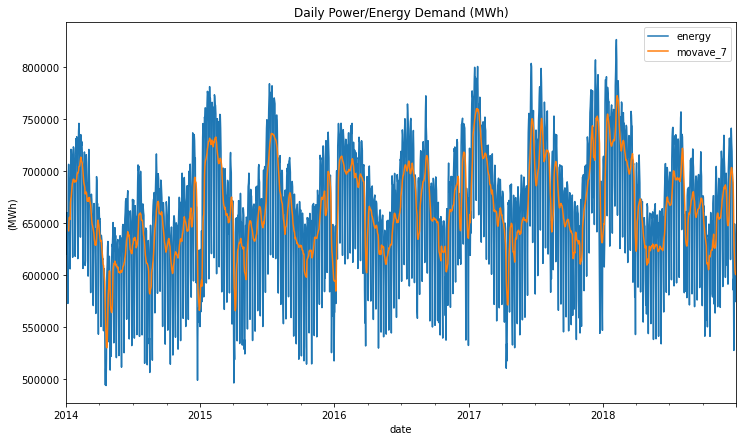

In [22]:
fig, ax = plt.subplots(1, figsize=(12, 7))
data[["energy", "movave_7"]].plot(title="Daily Power/Energy Demand (MWh)", ax=ax)
plt.ylabel("(MWh)")
plt.show()

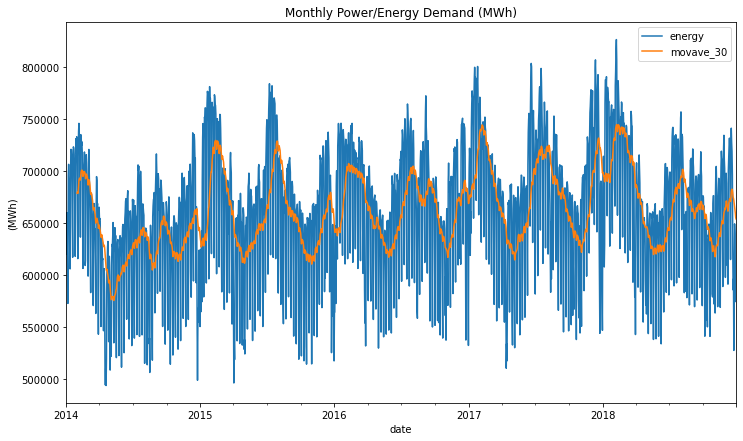

In [23]:
fig, ax = plt.subplots(1, figsize=(12, 7))
data[["energy", "movave_30"]].plot(title="Monthly Power/Energy Demand (MWh)", ax=ax)
plt.ylabel("(MWh)")
plt.show()

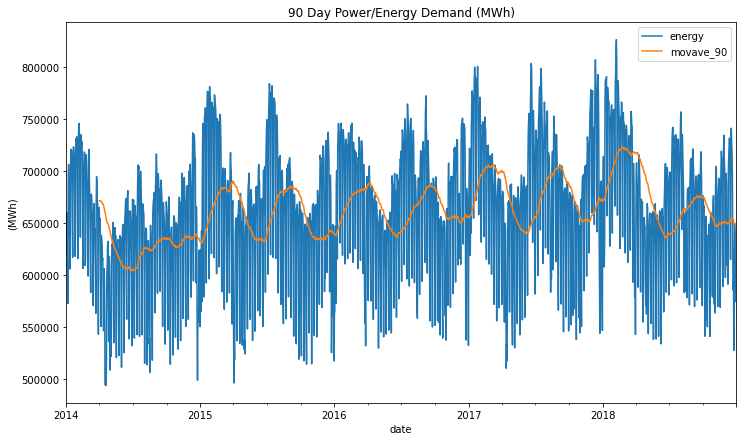

In [24]:
fig, ax = plt.subplots(1, figsize=(12, 7))
data[["energy", "movave_90"]].plot(title="90 Day Power/Energy Demand (MWh)", ax=ax)
plt.ylabel("(MWh)")
plt.show()

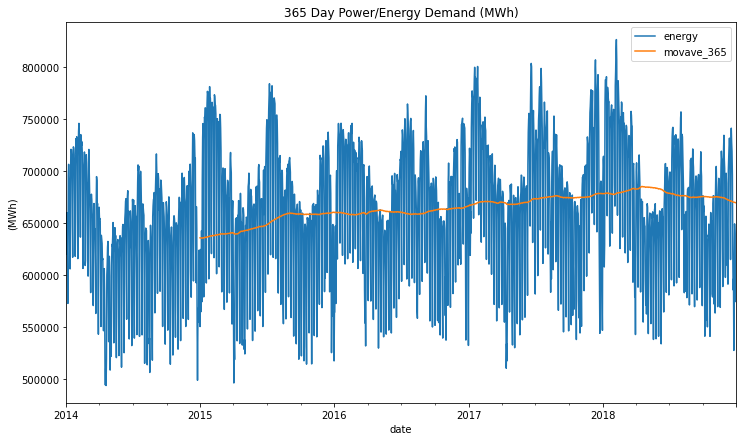

In [25]:
fig, ax = plt.subplots(1, figsize=(12, 7))
data[["energy", "movave_365"]].plot(title="365 Day Power/Energy Demand (MWh)", ax=ax)
plt.ylabel("(MWh)")
plt.show()

In [26]:
fs=18
fs1 =26
def plot_time_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None,
                title=None, start=0, end=None):

    sns.set()
    fig, ax = plt.subplots(figsize=(25, 12))
    ax.set_xlabel('Time', fontsize=fs)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=fs)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=fs)
    if label:
        ax.legend(fontsize=fs)
    if title:
        ax.set_title(title, fontsize=fs1)
    ax.grid(True)
    return ax

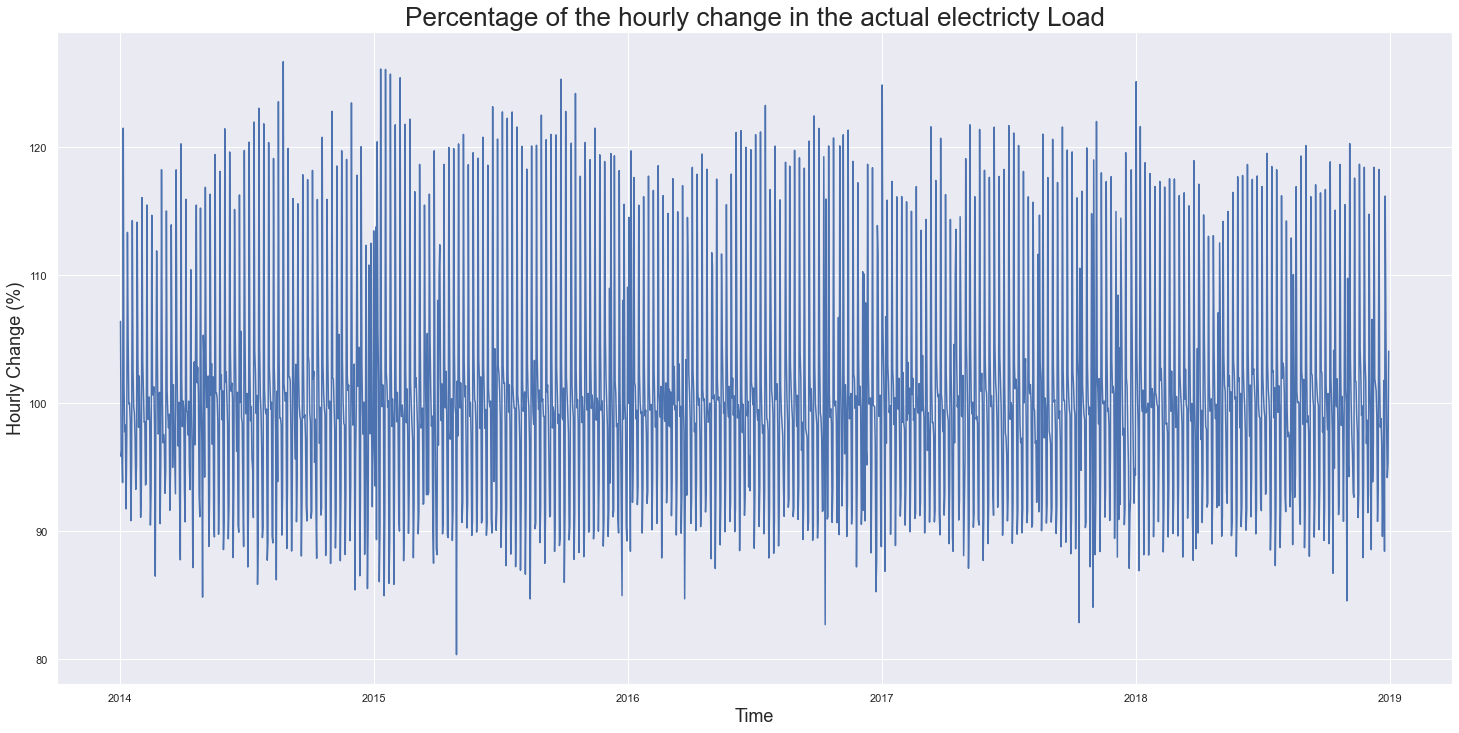

In [204]:
change = data['energy'].div(data['energy'].shift(1)).mul(100)
ax = plot_time_series(series=change, ylabel='Hourly Change (%)', 
                 title='Percentage of the hourly change in the actual electricty Load')
plt.show()

### EDA: Exploratory Data Analysis

Target Analysis, Seasonality and Trend

Characterization of the time series data

## Target Analyisis: Normality

In [120]:
mean = np.mean(data.energy.values)
std = np.std(data.energy.values)
skew = skew((data.energy.values))
ex_kurt = kurtosis(data.energy)
print("Skewness: {} \nKurtosis: {}".format(skew, ex_kurt+3))

Skewness: -0.2555279252628293 
Kurtosis: 2.6052606972453667


A Negative Skewness means that the data distribution is not completelly symetric and has a left tail.

Kurtosis below 3: It means that tails are slightly thinner than in a Normal distribution. It is said that the distribution is platykurtic and the chance of finding extre values is lower than in a normal distribution.

In [121]:
def shapiro_test(data, alpha=0.05):
    stat, pval = shapiro(data)
    print("H0: Data was drawn from a Normal Ditribution")
    if (pval<alpha):
        print("pval {} is lower than significance level: {}, therefore null hypothesis is rejected".format(pval, alpha))
    else:
        print("pval {} is higher than significance level: {}, therefore null hypothesis cannot be rejected".format(pval, alpha))
        
shapiro_test(data.energy, alpha=0.05)

H0: Data was drawn from a Normal Ditribution
pval 2.5413487980685545e-10 is lower than significance level: 0.05, therefore null hypothesis is rejected


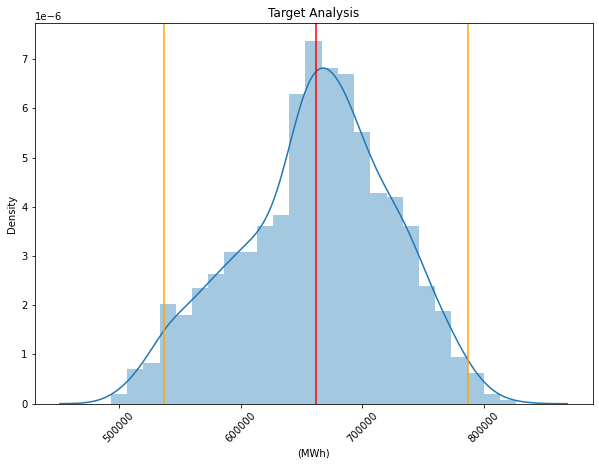

In [122]:
f, ax = plt.subplots(1, figsize=(10,7))
sns.distplot(data.energy,ax=ax )
plt.title("Target Analysis")
plt.xticks(rotation=45)
plt.xlabel("(MWh)")
plt.axvline(x=mean, color='r', linestyle='-', label="\mu: {0:.2f}%".format(mean))
plt.axvline(x=mean+2*std, color='orange', linestyle='-')
plt.axvline(x=mean-2*std, color='orange', linestyle='-')
plt.show()

The data seems to be displaying a normal distribution but it is not a normal distribution, because it has a small left tail.

### Volatility Analysis

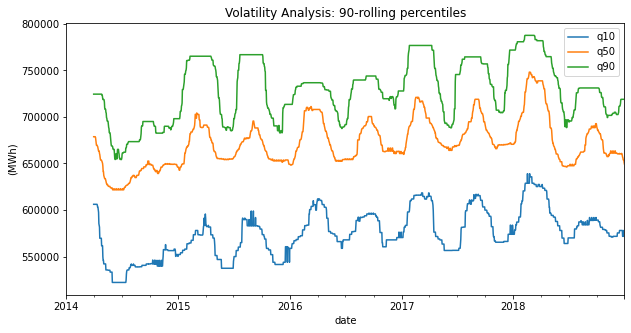

In [124]:
# Insert the rolling quantiles to the monthly returns
fig, ax = plt.subplots(1, figsize=(10,5))
data_rolling = data.energy.rolling(window=90)
data['q10'] = data_rolling.quantile(0.1).to_frame("q10")
data['q50'] = data_rolling.quantile(0.5).to_frame("q50")
data['q90'] = data_rolling.quantile(0.9).to_frame("q90")

data[["q10", "q50", "q90"]].plot(title="Volatility Analysis: 90-rolling percentiles", ax=ax)
plt.ylabel("(MWh)")
plt.show()

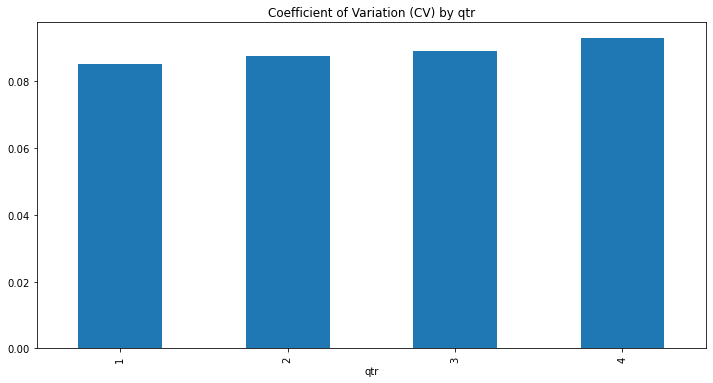

In [125]:
data.groupby("qtr")["energy"].std().divide(data.groupby("qtr")["energy"].mean()).plot(kind="bar",figsize=(12,6))
plt.title("Coefficient of Variation (CV) by qtr")
plt.show()

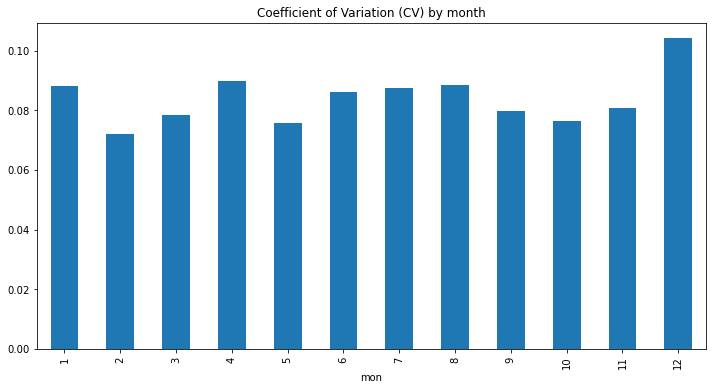

In [126]:
data.groupby("mon")["energy"].std().divide(data.groupby("mon")["energy"].mean()).plot(kind="bar", figsize=(12,6))
plt.title("Coefficient of Variation (CV) by month")
plt.show()

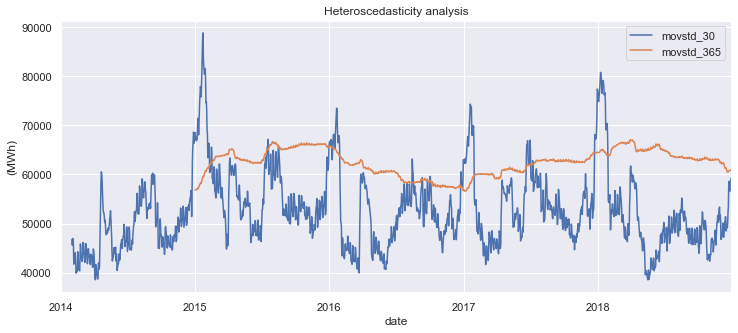

In [208]:
data[["movstd_30", "movstd_365"]].plot(title="Heteroscedasticity analysis", figsize=(12,5))
plt.ylabel("(MWh)")
plt.show()

In the short term (quaterly and monthly) volatility is changeable, but in the long term (year window) it is quite stable, therefore, candidate predictors will have to deal with seasonal pattern in variance.

### ADF Test on the Time Series Data

In [199]:
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [201]:
# ADF TEST

y = data['energy']
tst = adfuller(y, regression='c')
print('ADF Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(tst[0], tst[1], tst[2]))
for key, value in tst[4].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

ADF Statistic: -5.022364
p-value: 0.000020
#Lags used: 23
Critical Value (1%): -3.433986
Critical Value (5%): -2.863146
Critical Value (10%): -2.567625


### KPSS Test on the Time Series Data

In [202]:
kps_tst = kpss(y, regression='c', nlags='legacy')
print('KPSS Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(kps_tst[0], kps_tst[1], kps_tst[2]))
for key, value in kps_tst[3].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

KPSS Statistic: 0.722304
p-value: 0.011518
#Lags used: 25
Critical Value (10%): 0.347000
Critical Value (5%): 0.463000
Critical Value (2.5%): 0.574000
Critical Value (1%): 0.739000


### Time Series Analysis: Seasonality and Trend

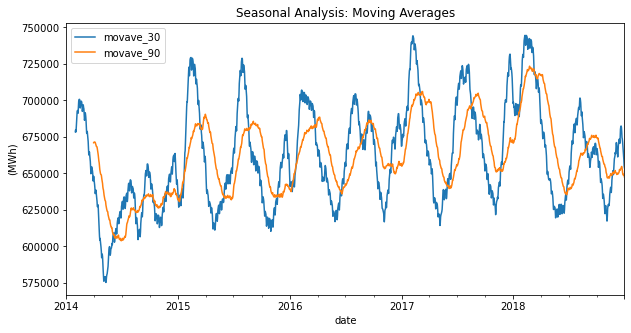

In [128]:
data[["movave_30", "movave_90"]].plot(title="Seasonal Analysis: Moving Averages", figsize=(10,5))
plt.ylabel("(MWh)")
plt.show()

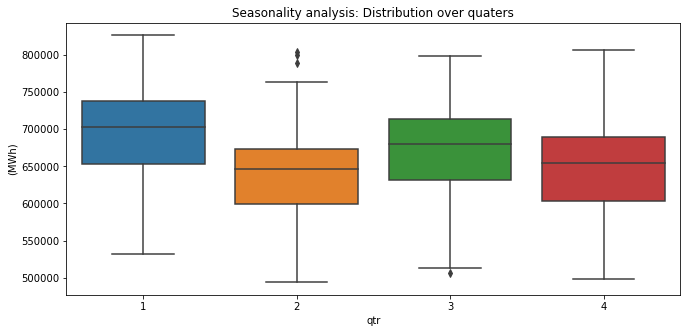

In [129]:
f, ax = plt.subplots(1, figsize=(11,5))
sns.boxplot(data=data, x="qtr", y="energy", ax= ax)
plt.title("Seasonality analysis: Distribution over quaters")
plt.ylabel("(MWh)")
plt.show()

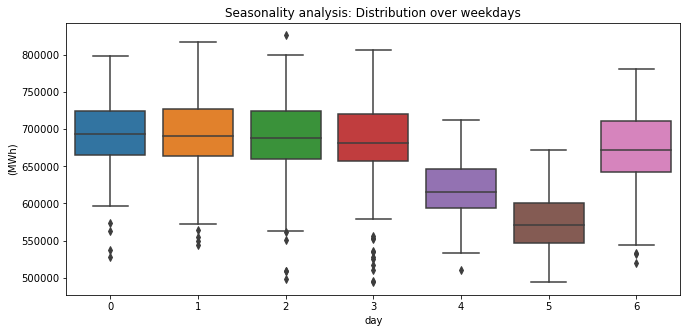

In [130]:
f, ax = plt.subplots(1, figsize=(11,5))
sns.boxplot(data=data, x="day", y="energy", ax=ax)
plt.title("Seasonality analysis: Distribution over weekdays")
plt.ylabel("(MWh)")
plt.show()

As expected, there are two clear seasonal pattern in quaterters and weekdays (0 is Monday)

In [131]:
data_mon = data.energy.resample("M").agg(sum).to_frame("energy")
data_mon["ix"] = range(0, len(data_mon))
data_mon[:5]

,energy,ix
date,,
2014-01-31,21017412.7,0
2014-02-28,19336398.7,1
2014-03-31,20040978.6,2
2014-04-30,17633177.7,3
2014-05-31,18572681.6,4


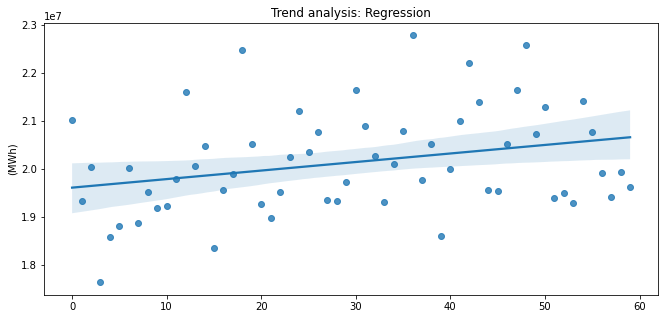

In [132]:
f, ax = plt.subplots(1, figsize=(11,5))
sns.regplot(data=data_mon,x="ix", y="energy", ax=ax)
plt.title("Trend analysis: Regression")
plt.ylabel("(MWh)")
plt.xlabel("")
plt.show()

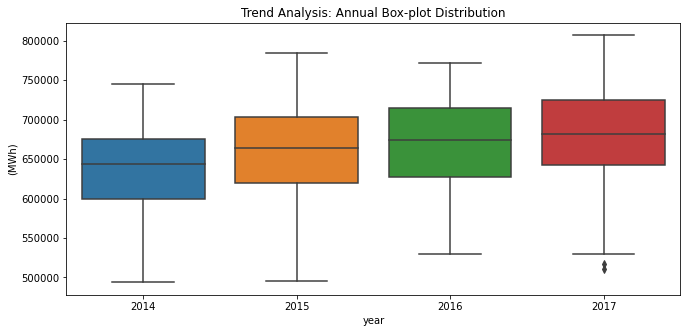

In [133]:
f, ax = plt.subplots(1, figsize=(11,5))
sns.boxplot(data=data["2014":"2017"], x="year", y="energy", ax=ax)
plt.title("Trend Analysis: Annual Box-plot Distribution")
plt.ylabel("(MWh)")
plt.show()

There is a positive linear (or sligthly damped) trend in energy demand, beacause of a steady economic grownth due to recession recovery.

### AUTO-Correlation Plots

Auto-correlation plots can also be used to identify seasonality in time series datasets.

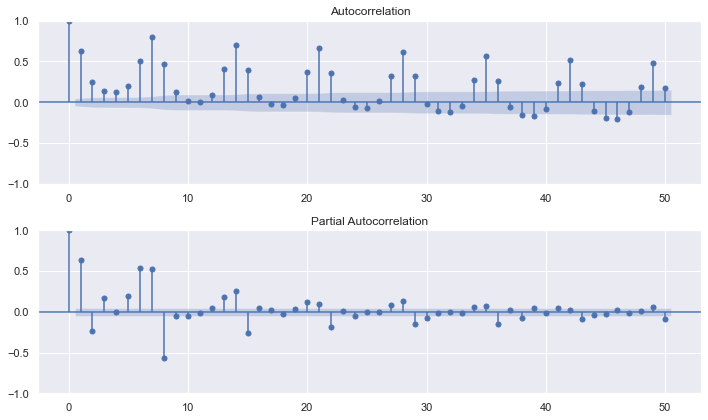

In [229]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 6))
plot_acf(data['energy'], lags=50, ax=ax1)
plot_pacf(data['energy'], lags=50, ax=ax2)
plt.tight_layout()
plt.show()

In [217]:
from statsmodels.tsa.api import adfuller, STL, seasonal_decompose

In [218]:
def check_stationarity(df):
    results = adfuller(df)[1:3]
    s = 'Non-Stationary'
    if results[0] < 0.05: 
        s = 'Stationary'
    print(f"'{s}\t p-value:{results[0]} \t lags:{results[1]}")
    return (s, results[0])

In [220]:
check_stationarity(y)

'Stationary	 p-value:2.0039064598183054e-05 	 lags:23


('Stationary', 2.0039064598183054e-05)

## Feature Engineering

The challenge now is to create some features in a very automated way that can deal with seasonality, trend and changes in  volatility. The most basic strategy is to use lagged features and rolling window statistics

* Momentum and Mean reversion, like Relative Strength Index
* Sequence minning

Data is standardized in order to allow application of models that are sensitive to scale, ANN & SVM

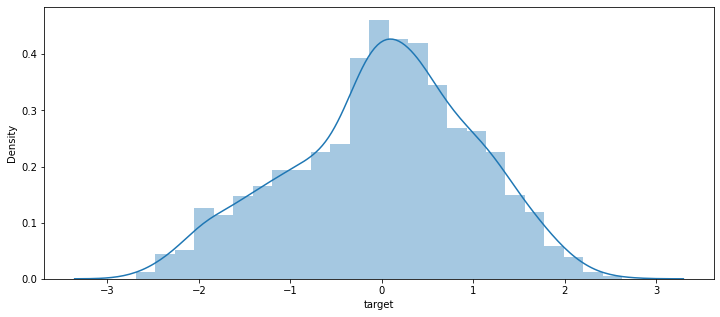

In [138]:
fig, ax = plt.subplots(figsize=(12,5))
data["target"] = data.energy.add(-mean).div(std)
sns.distplot(data["target"], ax=ax)
plt.show()

In [139]:
data.columns

Index(['energy', 'year', 'qtr', 'mon', 'week', 'day', 'ix', 'movave_7',
       'movstd_7', 'movave_30', 'movstd_30', 'movave_90', 'movstd_90',
       'movave_365', 'movstd_365', 'q10', 'q50', 'q90', 'target'],
      dtype='object')

In [ ]:
data.diff()

In [210]:
features = []
corr_features=[]
targets = []
tau = 30 #forecasting periods

for t in range(1, tau+1):
    data["target_t" + str(t)] = data.target.shift(-t)
    targets.append("target_t" + str(t))
    
for t in range(1,31):
    data["feat_ar" + str(t)] = data.target.shift(t)
    #data["feat_ar" + str(t) + "_lag1y"] = data.target.shift(350)
    features.append("feat_ar" + str(t))
    #corr_features.append("feat_ar" + str(t))
    #features.append("feat_ar" + str(t) + "_lag1y")
        
    
for t in [7, 14, 30]:
    data[["feat_movave" + str(t), "feat_movstd" + str(t), "feat_movmin" + str(t) ,"feat_movmax" + str(t)]] = data.energy.rolling(t).agg([np.mean, np.std, np.max, np.min])
    features.append("feat_movave" + str(t))
    #corr_features.append("feat_movave" + str(t))
    features.append("feat_movstd" + str(t))
    features.append("feat_movmin" + str(t))
    features.append("feat_movmax" + str(t))
    
months = pd.get_dummies(data.mon,prefix="mon",drop_first=True)
months.index = data.index
data = pd.concat([data, months], axis=1)

days = pd.get_dummies(data.day,prefix="day",drop_first=True)
days.index = data.index
data = pd.concat([data, days], axis=1)


features = features + months.columns.values.tolist() + days.columns.values.tolist()

In [211]:
corr_features = ["feat_ar1", "feat_ar2", "feat_ar3", "feat_ar4", "feat_ar5", "feat_ar6", "feat_ar7", "feat_movave7", "feat_movave14", "feat_movave30"]

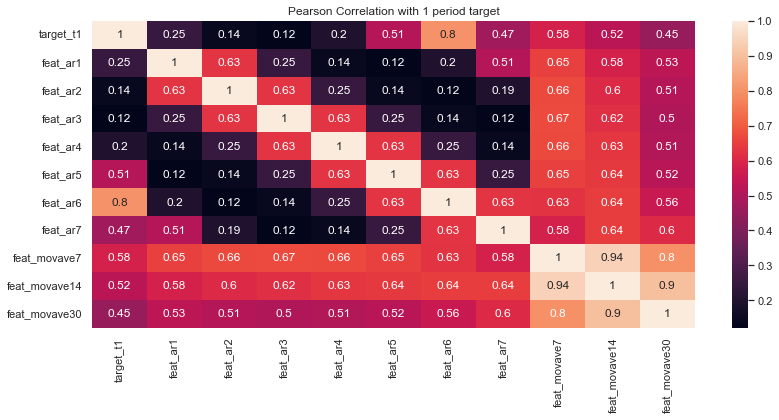

In [209]:
# Calculate correlation matrix
corr = data[["target_t1"] + corr_features].corr()

top5_mostCorrFeats = corr["target_t1"].apply(abs).sort_values(ascending=False).index.values[:6]

fig, ax = plt.subplots(1, figsize=(12,6))
# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True, ax=ax)
plt.title("Pearson Correlation with 1 period target")
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot

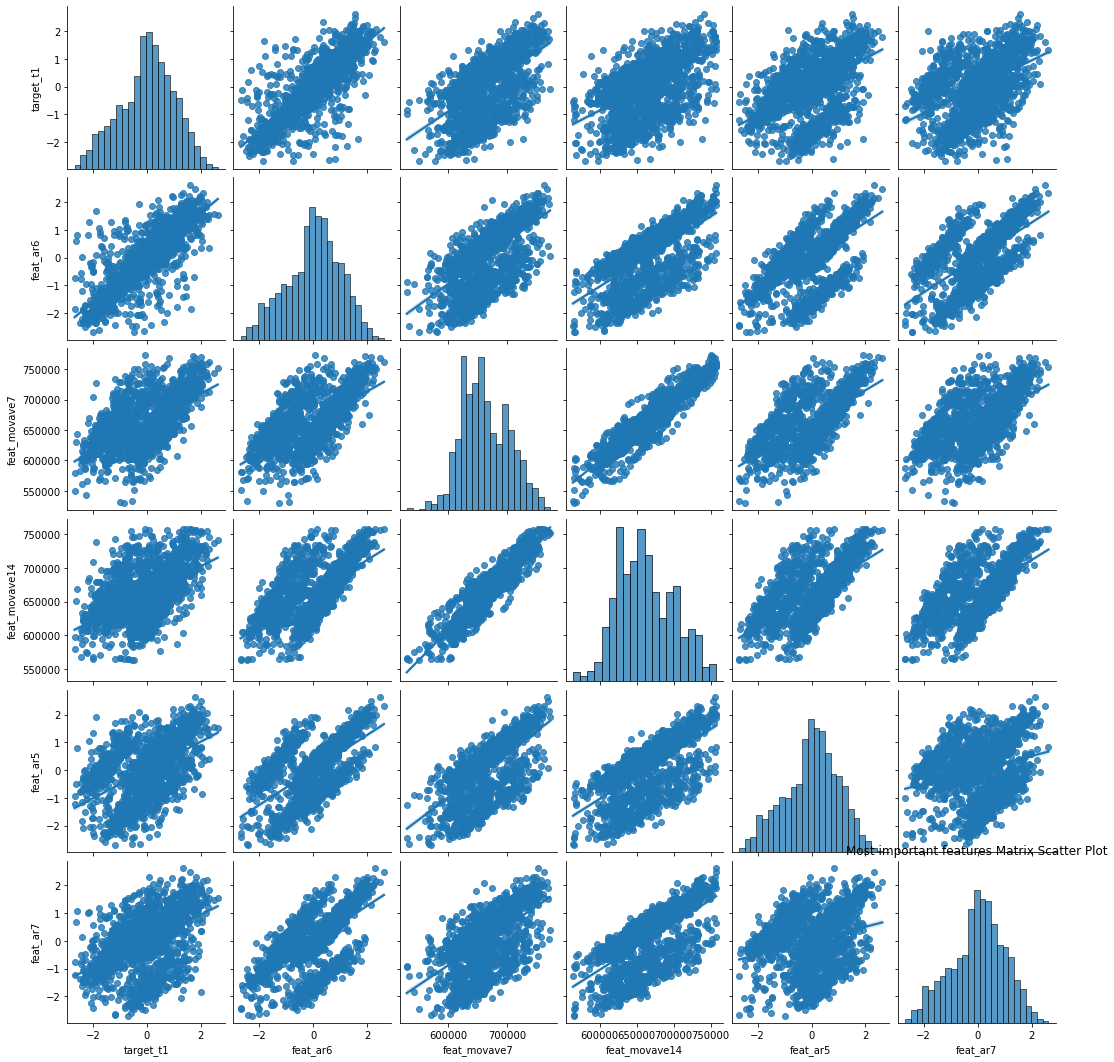

In [143]:
sns.pairplot(data=data[top5_mostCorrFeats].dropna(), kind="reg")
plt.title("Most important features Matrix Scatter Plot")
plt.show()

There are some features that are quite strongly linearly correlated with target, like AR_6 and MOVAVE_7, let's build some models and check this assumption

## Model Building

Two candidates models are build using MultiOutput Regression, it provides a framework to automatically and easily fit models to predict several target variables.

First a baseline Linear Regression Model  will be fit and then compared to a more advanced model which is the Random Forest Regressor.
A linear model does not need hyperparamenter tunning, and there is some correlation in data, so it is a strongh foundation, but there are several caveats:


Since time series data is not suitable to be used in CV, because **data is shuffled in order to build k-folds**. On the other hand, Sklearn provides TimeSeries Splits, that follows time structure of date and iterativelly performs GridSearch

In [147]:
data_feateng = data[features + targets].dropna()
nobs= len(data_feateng)
print("Number of observations: ", nobs)

Number of observations:  1765



For the year 2018, the data are used as a holdout data to CARRY OUT assessment of model performance and carry out some residual analysis (6 months)

Total number of observations:  1765
Train: (1431, 59)(1431, 30), 
Test: (334, 59)(334, 30)


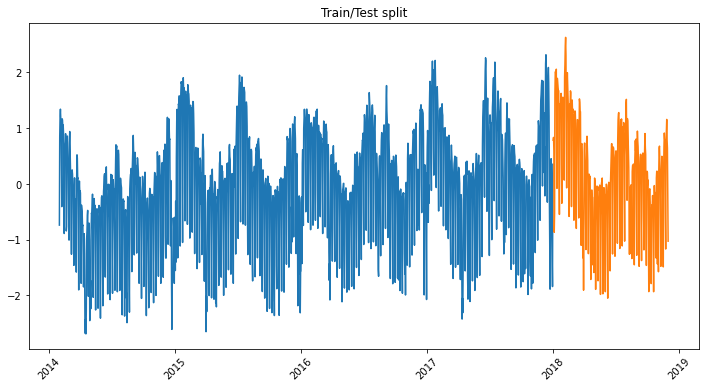

In [149]:
fig, ax = plt.subplots(1, figsize=(12,6))
X_train = data_feateng.loc["2014":"2017"][features]
y_train = data_feateng.loc["2014":"2017"][targets]

X_test = data_feateng.loc["2018"][features]
y_test = data_feateng.loc["2018"][targets]

n, k = X_train.shape
print("Total number of observations: ", nobs)
print("Train: {}{}, \nTest: {}{}".format(X_train.shape, y_train.shape,
                                              X_test.shape, y_test.shape))

plt.plot(y_train.index, y_train.target_t1.values, label="train")
plt.plot(y_test.index, y_test.target_t1.values, label="test")
plt.title("Train/Test split")
plt.xticks(rotation=45)
plt.show()

### Baseline Model: Linear Regression

In [291]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()

In [292]:

splits = TimeSeriesSplit(n_splits=3, max_train_size=365*2)

def TimeSplit_ModBuild(model, splits, X, y):
    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.metrics import mean_squared_error

    #Loop over each time split and for each
    for train_index, val_index in splits.split(X_train):
        _X_train_ = X.iloc[train_index]
        _y_train_ = y.iloc[train_index]
        _X_val_ = X.iloc[val_index]
        _y_val_ = y.iloc[val_index]
            
        reg.fit(_X_train_, _y_train_)
        p_train = model.predict(_X_train_)
        p_val = model.predict(_X_val_)
        score_train = np.mean(mean_squared_error(_y_train_, p_train))
        score_val = np.mean(mean_squared_error(_y_val_, p_val))
        print("Best-Fold Train RMSE: ", score_train)
        print("Best-Fold Val RMSE: ",score_val)
        print("\n")
        
reg_fold = TimeSplit_ModBuild(reg, splits, X_train, y_train["target_t1"])

Best-Fold Train RMSE:  0.09512533752604051
Best-Fold Val RMSE:  0.18004404241514008


Best-Fold Train RMSE:  0.10309510335949955
Best-Fold Val RMSE:  0.11487054627330426


Best-Fold Train RMSE:  0.09829624598588158
Best-Fold Val RMSE:  0.13539789253954884




In [296]:
p_train_reg = reg.predict(X_train)
train_resid_reg = y_train["target_t1"]- p_train_reg

p_test_reg = reg.predict(X_test)
test_resid_reg = y_test["target_t1"]- p_test_reg

test_df_reg = y_test[["target_t1"]]*std+mean
test_df_reg["pred_t1"] = p_test_reg*std+mean
test_df_reg["resid_t1"] = test_df_reg["target_t1"].add(-test_df_reg["pred_t1"])
test_df_reg["abs_resid_t1"] = abs(test_df_reg["resid_t1"])
test_df_reg["ape_t1"] = test_df_reg["resid_t1"].div(test_df_reg["target_t1"])

test_MAPE_reg = np.abs(test_df_reg["ape_t1"].mean()*100)
print("1-period ahead forecasting MAPE: ", test_MAPE_reg)

1-period ahead forecasting MAPE:  0.006537193954709124


### Train a Random Forest with Time Series Split to tune Hyperparameters

In this example, TimeSeriesSplit framework is shown, on each fold, train data is closer to the beginning of forecasting period

TRAIN: 360 TEST: 357


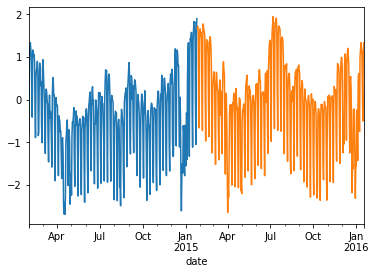

TRAIN: 717 TEST: 357


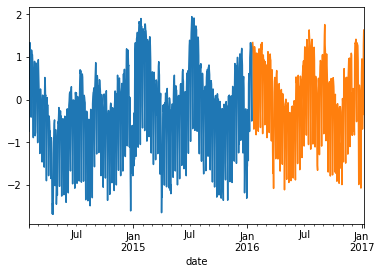

TRAIN: 730 TEST: 357


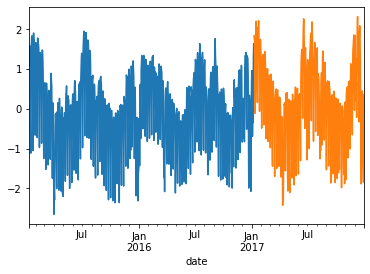

In [151]:
from sklearn.model_selection import TimeSeriesSplit, ParameterGrid

splits = TimeSeriesSplit(n_splits=3, max_train_size=365*2)
for train_index, val_index in splits.split(X_train):
    print("TRAIN:", len(train_index), "TEST:", len(val_index))
    y_train["target_t1"][train_index].plot()
    y_train["target_t1"][val_index].plot()
    plt.show()
   

In [152]:
from sklearn.ensemble import RandomForestRegressor

splits = TimeSeriesSplit(n_splits=3, max_train_size=365*2)
rfr = RandomForestRegressor()
# Create a dictionary of hyperparameters to search
rfr_grid = {"n_estimators": [500], 
        'max_depth': [3, 5, 10, 20, 30], 
        'max_features': [4, 8, 16, 32, 59], 
        'random_state': [123]}
rfr_paramGrid = ParameterGrid(rfr_grid)

def TimeSplit_ModBuild(model, paramGrid, splits, X, y):
    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.metrics import mean_squared_error

    #Loop over each time split and for each
    for train_index, val_index in splits.split(X_train):
        _X_train_ = X.iloc[train_index]
        _y_train_ = y.iloc[train_index]
        _X_val_ = X.iloc[val_index]
        _y_val_ = y.iloc[val_index]

        train_scores = []
        val_scores = []
        #models = []
        
        # Loop through the parameter grid, set the hyperparameters, and save the scores
        for g in paramGrid:
            model.set_params(**g)
            model.fit(_X_train_, _y_train_)
            p_train = model.predict(_X_train_)
            p_val = model.predict(_X_val_)
            score_train = np.mean(mean_squared_error(_y_train_, p_train))
            score_val = np.mean(mean_squared_error(_y_val_, p_val))
            train_scores.append(score_train)
            val_scores.append(score_val)
            #models.append(model)
            best_idx = np.argmin(val_scores)
            
        print("Best-Fold HyperParams:: ", paramGrid[best_idx])
        print("Best-Fold Train RMSE: ", train_scores[best_idx])
        print("Best-Fold Val RMSE: ",val_scores[best_idx])
        print("\n")
        
    #Return most recent model
    return train_scores, val_scores, best_idx


CV_rfr_tup = TimeSplit_ModBuild(rfr, rfr_paramGrid, splits, X_train, y_train["target_t1"])

Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 500, 'max_features': 32, 'max_depth': 10}
Best-Fold Train RMSE:  0.030324468201182342
Best-Fold Val RMSE:  0.21215787764817834


Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 500, 'max_features': 16, 'max_depth': 20}
Best-Fold Train RMSE:  0.022225084451683037
Best-Fold Val RMSE:  0.18590042166791146


Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 500, 'max_features': 16, 'max_depth': 10}
Best-Fold Train RMSE:  0.028482009744979626
Best-Fold Val RMSE:  0.217026072216893




In [240]:
best_rfr_idx = CV_rfr_tup[2]
best_rfr_grid = rfr_paramGrid[best_rfr_idx]
best_rfr = RandomForestRegressor().set_params(**best_rfr_grid).\
    fit(X_train.loc["2016":"2017"], y_train.loc["2016":"2017", "target_t1"])


Using Random Forest provides an important improvement compared to Linear Regression. As RF are built bootstrapping data, so some time structure may be lost.

### Feature Importance

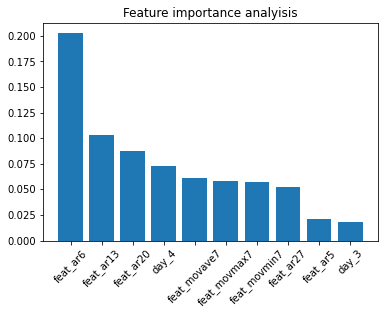

In [154]:
# Get feature importances from our random forest model
importances = best_rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
sorted_index_top = sorted_index[:10]
x = range(len(sorted_index_top))

# Create tick labels 
labels = np.array(features)[sorted_index_top]
plt.bar(x, importances[sorted_index_top], tick_label=labels)
plt.title("Feature importance analyisis")
# Rotate tick labels to vertical
plt.xticks(rotation=45)
plt.show()

## Model Assessment:

### Performance Metrics: MAPE (Mean Absolute Percent Error)



In [265]:
p_train = best_rfr.predict(X_train)
train_resid_1step = y_train["target_t1"]- p_train

p_test = best_rfr.predict(X_test)
test_resid_1step = y_test["target_t1"]- p_test

In [266]:
test_df = y_test[["target_t1"]]*std+mean
test_df["pred_t1"] = p_test*std+mean
test_df["resid_t1"] = test_df["target_t1"].add(-test_df["pred_t1"])
test_df["abs_resid_t1"] = abs(test_df["resid_t1"])
test_df["ape_t1"] = test_df["resid_t1"].div(test_df["target_t1"])

test_MAPE = test_df["ape_t1"].mean()*100
print("1-period ahead forecasting MAPE: ", test_MAPE)

1-period ahead forecasting MAPE:  0.08747070456988609


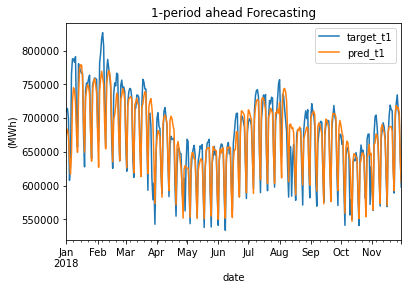

In [157]:
test_df[["target_t1", "pred_t1"]].plot()

plt.title("1-period ahead Forecasting")
plt.ylabel("(MWh)")
plt.legend()
plt.show()

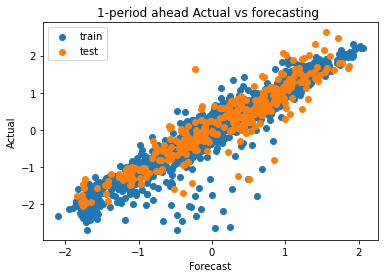

In [158]:
plt.scatter(y=y_train["target_t1"],x=p_train, label="train")
plt.scatter(y=y_test["target_t1"],x=p_test, label="test")
plt.title("1-period ahead Actual vs forecasting ")
plt.ylabel("Actual")
plt.xlabel("Forecast")
plt.legend()
plt.show()

Plotting actual vs forecasted provides a glance on how good model can fit train data and generalize to test data

### Residual Analysis

Residuals analysis will help in assessing whether there is any skewness in forecasting and check for normal distribution of resisuals

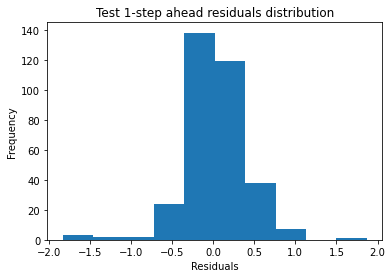

In [159]:
test_resid_1step.plot.hist(bins=10, title="Test 1-step ahead residuals distribution")
plt.xlabel("Residuals")
plt.show()

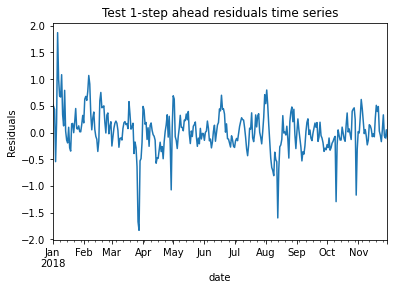

In [160]:
test_resid_1step.plot(title="Test 1-step ahead residuals time series")
plt.ylabel("Residuals")
plt.show()

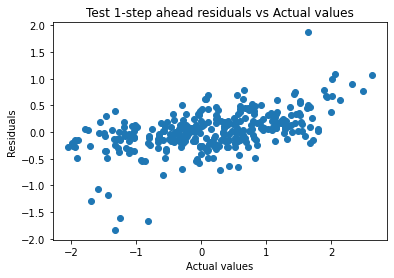

In [161]:
plt.scatter(x=y_test["target_t1"].values, y=test_resid_1step.values)
plt.title("Test 1-step ahead residuals vs Actual values")
plt.ylabel("Residuals")
plt.xlabel("Actual values")
plt.show()

## Forecasting

### Muti-period ahead model building

Once we know the best hiperparam set, a new instance of the RF model can be fit on the most recent (and relevant) data. Usually, it is considered that at least 2 years are needed in order to produce a long term daily forecast. Let's re-train a family of RF models using MultiOutput Regressor feature.

In [162]:
multi_rfr = RandomForestRegressor().set_params(**best_rfr_grid).\
    fit(X_train.loc["2016":"2017"], y_train.loc["2016":"2017"])

In [163]:
p_train = multi_rfr.predict(X_train)
train_resid_1step = y_train- p_train

p_test = multi_rfr.predict(X_test)
test_resid_1step = y_test- p_test

### Performance Metrics: MAPE (Mean Absolute Percent Error)

Lastly, it is necesary to test forecasting accuracy in several periods, and assess whether it is stable.

In [164]:
periods = [1, 7, 14, 30]

ytest_df = y_test*std+mean
ptest_df = pd.DataFrame(data=p_test*std+mean, index=test_df.index, columns=["pred_t" + str(i) for i in range(1, 31)])
test_df = pd.concat([ytest_df, ptest_df], axis=1)

test_MAPE = []

for t in periods:
    test_df["resid_t" + str(t)] = test_df["target_t" + str(t)].add(-test_df["pred_t" + str(t)])
    test_df["abs_resid_t" + str(t)] = abs(test_df["resid_t" + str(t)])
    test_df["ape_t" + str(t)] = test_df["abs_resid_t" + str(t)].div(test_df["target_t" + str(t)])
    test_MAPE.append(round(test_df["ape_t" + str(t)].mean(), 4)*100)

print("MAPE test: ", test_MAPE)

MAPE test:  [2.67, 3.6999999999999997, 3.7900000000000005, 4.2299999999999995]


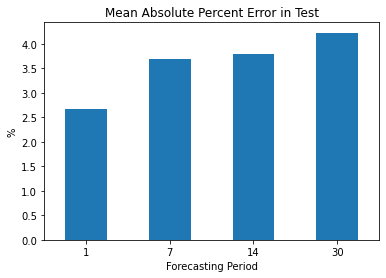

In [165]:
mape_df = pd.DataFrame(index=periods, data={"test_MAPE": test_MAPE})
mape_df.plot(kind="bar", legend=False)
plt.title("Mean Absolute Percent Error in Test")
plt.xlabel("Forecasting Period")
plt.ylabel("%")
plt.xticks(rotation=0)
plt.show()

### Actual vs Forecasted


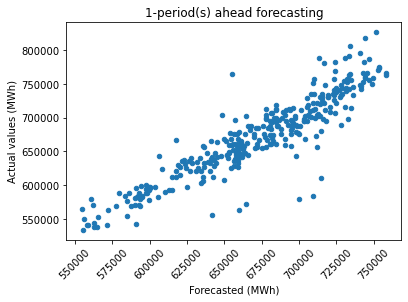

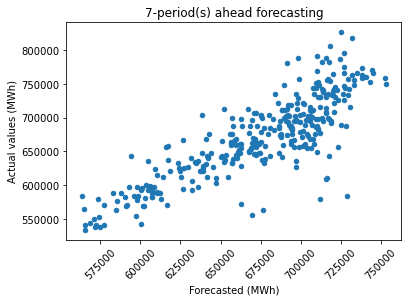

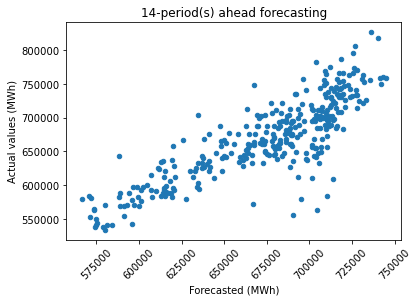

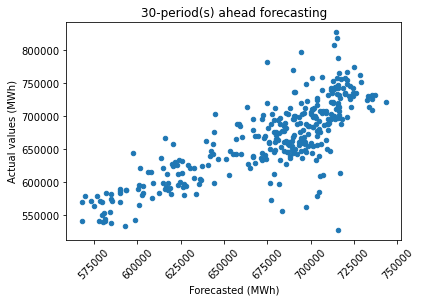

In [166]:
#f, ax = plt.subplots(nrows=3,ncols=2)
for t in periods:
    test_df[["target_t" + str(t), "pred_t" + str(t)]].plot(x="pred_t" + str(t), y="target_t" + str(t) ,kind="scatter")
    plt.title("{}-period(s) ahead forecasting".format(t))
    plt.xlabel("Forecasted (MWh)")
    plt.ylabel("Actual values (MWh)")
    plt.xticks(rotation=45)
    plt.show()

It can be seen that, as forecasting period is longer, scattering is greater, specially for extreme values

### Forecasting 30-days ahead

In [167]:
test_df.index = test_df.index.date

In [247]:
forecast_range = pd.date_range(start=np.max(test_df.index.values), periods=tau, freq="D")
len(forecast_range)

30

In [169]:
forecast = []
for t in range(0, tau):
    #print(-(t+1), (t))
    forecast = p_test[-(t+1):,(t)]*std+mean

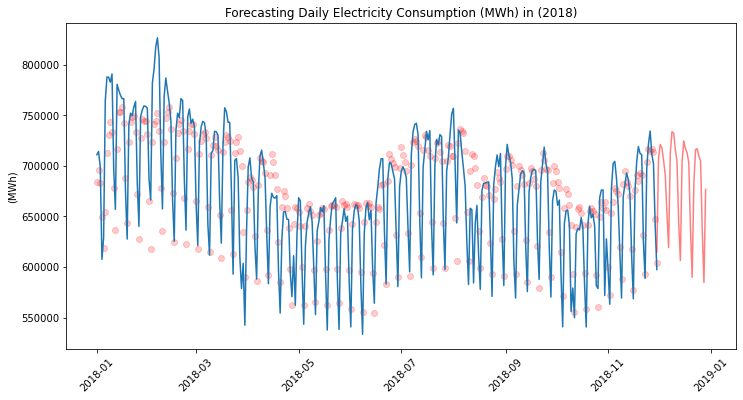

In [172]:
test_df["target_t1"].plot(figsize=(12,6))
plt.scatter(x=test_df.index, y=test_df["pred_t1"], c="r", alpha=0.2, label="test preds")
plt.plot(forecast_range, forecast, c="r", alpha=0.5, label="forecasting")
plt.ylabel("(MWh)")
plt.xticks(rotation=45)
plt.title("Forecasting Daily Electricity Consumption (MWh) in (2018)")
plt.show()

### Utility function to compute MAPE

In [272]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

### MLP Regression

In [179]:
def plot_model_rmse_and_loss(history):
    # Evaluate train and validation accuracies and losses
    train_rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Visualize epochs vs. train and validation accuracies and losses
    
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_rmse, label='Training RMSE')
    plt.plot(val_rmse, label='Validation RMSE')
    plt.legend()
    plt.title('Epochs vs. Training and Validation RMSE')
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Epochs vs. Training and Validation Loss')
    plt.show()

In [180]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(solver='lbfgs', 
                   alpha=1e-3,     # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(3, 1),
                   learning_rate_init=0.1,
                   
                   activation='relu',
                   max_iter=1000,
                   random_state=24)

In [189]:
mlp_reg

MLPRegressor(alpha=0.001, hidden_layer_sizes=(3, 1), learning_rate_init=0.1,
             max_iter=1000, random_state=24, solver='lbfgs')

In [190]:
p_train_mlp = mlp_reg.predict(X_train)
p_test_mlp= mlp_reg.predict(X_test)

In [191]:
from sklearn.metrics import mean_squared_error
RMSE_train_mlp = np.sqrt(mean_squared_error(y_train["target_t1"], p_train_mlp))
RMSE_test_mlp = np.sqrt(mean_squared_error(y_test["target_t1"], p_test_mlp))

print("Train RMSE: {}\nTest RMSE: {}".format(RMSE_train_mlp, RMSE_test_mlp))

Train RMSE: 1.0096581083449443
Test RMSE: 0.985814926199397


In [264]:
splits = TimeSeriesSplit(n_splits=3, max_train_size=365*2)
def TimeSplit_ModBuild(model, splits, X, y):
    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.metrics import mean_squared_error
    #Loop over each time split and for each
    for train_index, val_index in splits.split(X_train):
        _X_train_ = X.iloc[train_index]
        _y_train_ = y.iloc[train_index]
        _X_val_ = X.iloc[val_index]
        _y_val_ = y.iloc[val_index]
            
        model.fit(_X_train_, _y_train_)
        p_train = model.predict(_X_train_)
        p_val = model.predict(_X_val_)
        score_train = np.mean(mean_squared_error(_y_train_, p_train))
        score_val = np.mean(mean_squared_error(_y_val_, p_val))

        print("Best-Fold Train RMSE: ", score_train)
        print("Best-Fold Val RMSE: ",score_val)
        print("\n")

mlp_fold = TimeSplit_ModBuild(model, splits, X_train, y_train["target_t1"])

Best-Fold Train RMSE:  0.912134887756361
Best-Fold Val RMSE:  1.1710491125781983


Best-Fold Train RMSE:  1.009865243357914
Best-Fold Val RMSE:  0.9113709160791028


Best-Fold Train RMSE:  0.9590284505264909
Best-Fold Val RMSE:  1.1155588981504851




In [267]:
p_train_mlp_reg = model.predict(X_train)
train_resid_1 = y_train["target_t1"]- p_train_mlp_reg

p_test_mlp_reg = model.predict(X_test)
test_resid_1 = y_test["target_t1"]- p_test_mlp_reg

test_df_mlp = y_test[["target_t1"]]*std+mean
test_df_mlp["pred_t1"] = p_test_mlp_reg*std+mean
test_df_mlp["resid_t1"] = test_df_mlp["target_t1"].add(-test_df_mlp["pred_t1"])
test_df_mlp["abs_resid_t1"] = abs(test_df_mlp["resid_t1"])
test_df_mlp["ape_t1"] = test_df_mlp["resid_t1"].div(test_df_mlp["target_t1"])

test_MAPE_mlp = test_df_mlp["ape_t1"].mean()*100
print("1-period ahead forecasting MAPE: ", test_MAPE_mlp)

1-period ahead forecasting MAPE:  0.23675347848462613


## ARIMA Model

The difference between an ARMA and ARIMA, written as ARIMA(p, d, q), is in the 
stationarity assumption. The d parameter in ARIMA is for the differencing order. An 
ARMA model assumes a stationary process, while an ARIMA model does not since it 
handles differencing. An ARIMA model is a more generalized model since it can satisfy 
an ARMA model by making the differencing factor d=0. Hence, ARIMA(1,0,1) is 
ARMA(1,1).

In [232]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [235]:
auto_model = pm.auto_arima(y_train['target_t1'], 
                           seasonal=True, 
                           m=12, 
                           test='adf',
                           stepwise=True)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 1431
Model:             SARIMAX(5, 0, 5)x(2, 0, [1, 2], 12)   Log Likelihood                -844.518
Date:                                 Wed, 07 Sep 2022   AIC                           1719.037
Time:                                         15:20:25   BIC                           1798.029
Sample:                                     01-31-2014   HQIC                          1748.534
                                          - 12-31-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8032      0.003    523.241      0.000       1.796       1.810
ar.L2         -2.2392      0.007   -314.959      0.000      -2.253      -2.225
ar.L3          2.2244      0.009    250.505      0.000       2.207       2.242
ar.L4         -1.7770      0.007   -260.414      0.000      -1.790      -1.764
ar.L5          0.9872      0.003    298.658      0.000       0.981       0.994
ma.L1         -1.2381      0.018    -67.552      0.000      -1.274      -1.202
ma.L2          1.6919      0.027     63.309      0.000       1.640       1.744
ma.L3         -1.2923      0.037    -35.053      0.000      -1.365      -1.220
ma.L4          1.2046      0.029     41.414      0.000       1.148       1.262
ma.L5         -0.4134      0.022    -19.214      0.000      -0.456      -0.371
ar.S.L12       0.0824      0.235      0.350      0.726      -0.379       0.543
ar.S.L24      -0.3464      0.149     -2.320      0.020      -0.639      -0.054
ma.S.L12       0.0966      0.232      0.417      0.677      -0.357       0.550
ma.S.L24       0.4424      0.128      3.455      0.001       0.191       0.693
sigma2         0.1887      0.005     38.739      0.000       0.179       0.198
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               760.14
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.77
Prob(H) (two-sided):                  0.45   Kurtosis:                         6.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### SARIMA-Forecast

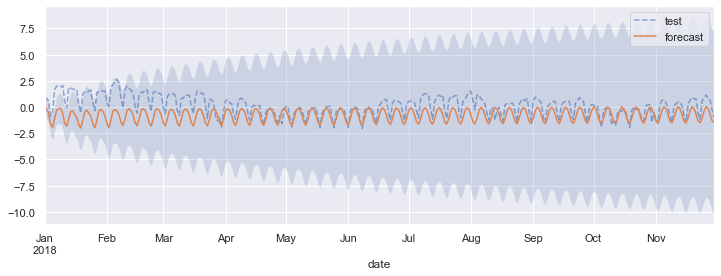

In [239]:
n = y_test["target_t1"].shape[0]
forecast, conf_interval = auto_model.predict(n_periods=n, return_conf_int=True)
lower_ci, upper_ci  = zip(*conf_interval)
index = y_test["target_t1"].index
ax = y_test["target_t1"].plot(style='--', alpha=0.6, figsize=(12,4))
pd.Series(forecast, index=index).plot(style='-', ax=ax)
plt.fill_between(index, lower_ci, upper_ci, alpha=0.2)
plt.legend(['test', 'forecast']); plt.show()

In [243]:
import math
rmse_sarimax = math.sqrt(mean_squared_error(y_test['target_t1'],forecast))

In [244]:
rmse_sarimax

1.2428582894650522

In [273]:
mape_sarimax = MAPE(y_test['target_t1'],forecast)

In [274]:
mape_sarimax

3.870395498500445

### Support Vector Regression

In [276]:
from sklearn.svm import SVR

In [279]:
svr = SVR(kernel='rbf', gamma='scale',verbose=True)

In [280]:
splits = TimeSeriesSplit(n_splits=3, max_train_size=365*2)
def TimeSplit_ModBuild(model, splits, X, y):
    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.metrics import mean_squared_error
    #Loop over each time split and for each
    for train_index, val_index in splits.split(X_train):
        _X_train_ = X.iloc[train_index]
        _y_train_ = y.iloc[train_index]
        _X_val_ = X.iloc[val_index]
        _y_val_ = y.iloc[val_index]
            
        model.fit(_X_train_, _y_train_)
        p_train = model.predict(_X_train_)
        p_val = model.predict(_X_val_)
        score_train = np.mean(mean_squared_error(_y_train_, p_train))
        score_val = np.mean(mean_squared_error(_y_val_, p_val))

        print("Best-Fold Train RMSE: ", score_train)
        print("Best-Fold Val RMSE: ",score_val)
        print("\n")

mlp_fold = TimeSplit_ModBuild(svr, splits, X_train, y_train["target_t1"])

[LibSVM]Best-Fold Train RMSE:  0.7413017511427841
Best-Fold Val RMSE:  0.7896766781089304


[LibSVM]Best-Fold Train RMSE:  0.7794320022878386
Best-Fold Val RMSE:  0.677890476890477


[LibSVM]Best-Fold Train RMSE:  0.7869382681177765
Best-Fold Val RMSE:  0.7861079037415765




In [282]:
p_train_svr = svr.predict(X_train)
train_resid_sv = y_train["target_t1"]- p_train_svr

p_test_svr = svr.predict(X_test)
test_resid_sv = y_test["target_t1"]- p_test_svr

test_df_svr = y_test[["target_t1"]]*std+mean
test_df_svr["pred_t1"] = p_test_svr*std+mean
test_df_svr["resid_t1"] = test_df_svr["target_t1"].add(-test_df_svr["pred_t1"])
test_df_svr["abs_resid_t1"] = abs(test_df_svr["resid_t1"])
test_df_svr["ape_t1"] = test_df_svr["resid_t1"].div(test_df_svr["target_t1"])

test_MAPE_svr = np.abs(test_df_svr["ape_t1"].mean()*100)
print("1-period ahead forecasting MAPE: ", test_MAPE_svr)

1-period ahead forecasting MAPE:  3.2119441370176203


## Mean Absolute Error (MAE)

In [288]:
from sklearn.metrics import mean_absolute_error

The average discrepancy between the estimated and real values is computed using mean absolute error. As it calculates inaccuracy in observations made on the same scale, it is also known as scale-dependent accuracy. It serves as a machine learning assessment metric for regression models. It estimates the discrepancies between the model's predicted values and the actual values. It is employed to forecast the machine learning model's accuracy.

In [295]:
linearreg_mae = mean_absolute_error(y_test['target_t1'], p_test_reg)
rforest_mae = mean_absolute_error(y_test['target_t1'], p_test)
mlp_mae = mean_absolute_error(y_test['target_t1'], p_test_mlp_reg )
svr_mae = mean_absolute_error(y_test['target_t1'], p_test_svr)
arima_mae = mean_absolute_error(y_test['target_t1'], forecast)

print('Linear Regression MAE : ',linearreg_mae)
print('Random Forest Regression MAE:', rforest_mae)
print('MLP Rgression MAE:', mlp_mae)
print('Support Vector Regression MAE:', svr_mae)
print('ARIMA Model MAE:', arima_mae)

Linear Regression MAE :  0.19066412965618632
Random Forest Regression MAE: 0.18639831644314184
MLP Rgression MAE: 0.7921812407311745
Support Vector Regression MAE: 0.6186878261201688
ARIMA Model MAE: 1.0147435061320362
